In [28]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [29]:
stock = pd.read_csv('C:/Users/Connor/Cs5804/mini-project-stock-ML/SPY_Trading_Project/data/raw/SPY.csv')

In [30]:
def preprocess_data(stock, sequence_length):
    data = stock[['Close']].values
    scaler = MinMaxScaler(feature_range=(0, 1))
    data = scaler.fit_transform(data)
    
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:(i + sequence_length)])
        y.append(data[i + sequence_length])
    
    return np.array(X), np.array(y), scaler

In [31]:
# Define the LSTM model
def build_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(units=50, return_sequences=True, input_shape=input_shape))
    model.add(LSTM(units=50))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [32]:
# Prepare the data
sequence_length = 60  # Number of days to use for prediction
X, y, scaler = preprocess_data(stock, sequence_length)

# Split the data into training and test sets
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Build and train the LSTM model
model = build_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)


In [33]:
# Make predictions
y_pred = model.predict(X_test)
y_pred = scaler.inverse_transform(y_pred)  # Inverse transform to get actual prices
y_test = scaler.inverse_transform(y_test)

# Evaluate the model
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 9.474195483300528


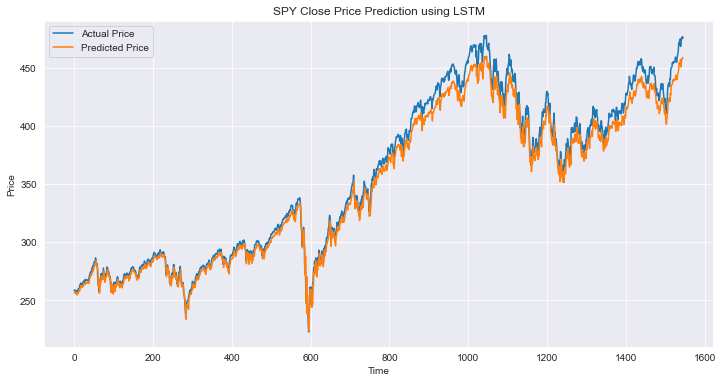

In [34]:
# Plot the results
plt.figure(figsize=(12,6))
plt.plot(y_test, label='Actual Price')
plt.plot(y_pred, label='Predicted Price')
plt.title('SPY Close Price Prediction using LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [36]:
from sklearn.metrics import r2_score
from keras.losses import mean_absolute_error

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Absolute Error: [ 1.7965088  2.4236145  1.005127  ... 18.521301  18.115936  16.597748 ]
Mean Squared Error: 89.76038005579213
Root Mean Squared Error: 9.474195483300528
R-squared: 0.9814364654999356
